**Imports**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Load Dataset**

In [19]:
df = pd.read_csv('data/Base.csv')

**Separate Label and Features**

In [20]:
# Separate out the fraud labels
y = df['fraud_bool']

# Keep features minus fraud label
X = df.drop('fraud_bool', axis=1)

**Feature Engineering**

In [21]:
# Drop 'device_fraud_count' from X_data as it only has a single unique value in the dataset
X = X.drop(labels='device_fraud_count', axis=1)

# One Hot Vector Encoding for Category Features
cat_columns = X.select_dtypes('object').columns
X = pd.get_dummies(X, columns=cat_columns)

**Train / Test Split**

In [22]:
from sklearn.model_selection import train_test_split

my_random_state = 42

# Peform a 75%/25% Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = my_random_state)

In [23]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape: (750000, 51)
y_train Shape: (750000,)
X_test Shape:  (250000, 51)
y_test Shape:  (250000,)


**Generate Scaled Dataset**

In [24]:
X_train.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
494524,0.9,0.707762,-1,4,30,0.026419,49.239540,475,2477.277226,4801.134380,...,False,False,False,True,False,True,False,False,False,False
306517,0.9,0.756983,-1,68,20,0.040217,-0.759910,1071,4157.338470,7546.796370,...,False,False,False,True,False,False,False,False,True,False
454756,0.7,0.851095,-1,303,40,0.014951,-1.161162,545,4317.755841,2777.815594,...,False,False,False,True,False,False,False,True,False,False
84573,0.9,0.763061,-1,27,20,0.008618,50.776737,966,410.893516,4355.611708,...,False,False,False,True,False,False,False,False,True,False
892561,0.8,0.133586,-1,33,40,0.014382,-1.165219,668,2566.101161,2162.235746,...,False,False,False,True,False,True,False,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [26]:
X_train_scaled.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1.161340,0.740454,-0.402383,-0.934568,-0.307466,-0.185560,2.004846,-1.092478,-1.058760,0.020882,...,-0.451029,-0.041509,-0.01596,0.084362,-0.084362,1.416176,-0.23847,-0.722048,-0.598195,-0.085453
1,1.161340,0.910735,-0.402383,-0.210814,-1.138954,-0.183001,-0.465733,-0.499336,-0.500563,1.876309,...,-0.451029,-0.041509,-0.01596,0.084362,-0.084362,-0.706127,-0.23847,-0.722048,1.671696,-0.085453
2,0.472625,1.236324,-0.402383,2.446718,0.524021,-0.187687,-0.485560,-1.022813,-0.447264,-1.346410,...,-0.451029,-0.041509,-0.01596,0.084362,-0.084362,-0.706127,-0.23847,1.384949,-0.598195,-0.085453
3,1.161340,0.931762,-0.402383,-0.674469,-1.138954,-0.188861,2.080802,-0.603832,-1.745312,-0.280188,...,-0.451029,-0.041509,-0.01596,0.084362,-0.084362,-0.706127,-0.23847,-0.722048,1.671696,-0.085453
4,0.816982,-1.245952,-0.402383,-0.606617,0.524021,-0.187792,-0.485761,-0.900403,-1.029248,-1.762398,...,-0.451029,-0.041509,-0.01596,0.084362,-0.084362,1.416176,-0.23847,-0.722048,-0.598195,-0.085453


**Metric Scoring**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

def get_scores(model_dict, sampler_dict):

    results_metric, results_prob, results_pred = [], [], []

    for model_name, model in model_dict.items():
        for sampler_name, sampler in sampler_dict.items():
            print('Starting: ', model_name, sampler_name)
            if sampler:
                if 'RandomUnderSampler' in sampler_name:
                    pipeline = ImbPipeline([('sampler', sampler), 
                                            ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=my_random_state)), 
                                            ('clf', model)])
                else:
                    pipeline = ImbPipeline([('sampler', sampler), ('clf', model)])
            else:
                pipeline = Pipeline([('sampler', sampler), ('clf', model)])
            
            # Change feature dataset if needs to be scaled
            if 'scaled' in model_name:
                 pipeline.fit(X_train_scaled, y_train)
            else:     
                pipeline.fit(X_train, y_train)
            
            # Get preditions and probabilities
            preds = pipeline.predict(X_test)
            probs = pipeline.predict_proba(X_test)
            probs = probs[:, 1]

            scoring = {'Precision': precision_score,
                       'Recall': recall_score,
                       'F1-Score': f1_score,
                       'ROC AUC': roc_auc_score}

            scores = {}
            for metric_name, metric in scoring.items():
                    score = metric(y_test, preds)
                    scores[metric_name] = score

            result_metric = {'Model': model_name,
                             'Resampler': sampler_name,
                             **scores}
            result_prob = (model_name, sampler_name, probs)
            
            result_pred = (model_name, sampler_name, preds)
                    
            results_metric.append(result_metric)
            results_prob.append(result_prob)
            results_pred.append(result_pred)
            
    return pd.DataFrame(results_metric), results_prob, results_pred


**Classification Models**

In [28]:
# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

set_num_jobs = 8
set_max_iter = 8000
set_n_estimators = 200

# Models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=set_max_iter, random_state=my_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (scaled)': LogisticRegression(max_iter=set_max_iter, random_state=my_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (balanced)': LogisticRegression(class_weight='balanced', max_iter=set_max_iter, random_state=my_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (scaled, balanced)': LogisticRegression(class_weight='balanced', max_iter=set_max_iter, random_state=my_random_state, n_jobs=set_num_jobs),
    'Decision Tree': DecisionTreeClassifier(random_state=my_random_state),
    'Decision Tree (balanced)': DecisionTreeClassifier(class_weight='balanced', random_state=my_random_state),
    'Random Forest': RandomForestClassifier(n_estimators=set_n_estimators, random_state=my_random_state, n_jobs=set_num_jobs),
    'Random Forest (balanced)': RandomForestClassifier(class_weight='balanced', n_estimators=set_n_estimators, random_state=my_random_state, n_jobs=set_num_jobs),
    'Gradient Boosting': GradientBoostingClassifier(random_state=my_random_state),
    'LightGBM': LGBMClassifier(random_state=my_random_state, n_jobs=set_num_jobs, verbose=0),
    'LightGBM (balanced)': LGBMClassifier(class_weight='balanced', random_state=my_random_state, n_jobs=set_num_jobs, verbose=0),
    'LightGBM (scaled, balanced)': LGBMClassifier(class_weight='balanced', random_state=my_random_state, n_jobs=set_num_jobs, verbose=0),
    'XGBoost': XGBClassifier(random_state=my_random_state, n_jobs=4)
}

**Under / Over Sampling Methods**

In [29]:
# Sampling Imports
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Resampling methods to test for imbalanced data
resampling_methods = {
    'No Resampling': None,
    'SMOTE': SMOTE(sampling_strategy=0.1, random_state=my_random_state),
    'SMOTE RandomUnderSampler': SMOTE(sampling_strategy=0.1, random_state=my_random_state),
    'NearMiss': NearMiss(sampling_strategy=0.1)
}

**Generate Scores for Models + Resampling**

In [30]:
# Generate and fit models
# results_metrics_generated, results_prob_generated, results_pred_generated = get_scores(models, resampling_methods)

# Note, can load the saved results in next cell instead of re-running code (takes ~40 mins to train/fit)

**Save and Load Results from Model Fitting**

In [31]:
# Note, it is not necessary to re-run get_scores. Results can be loaded from:
# 'final_project_results_metrics.csv'
# 'final_project_results_prob.pkl'
# 'final_project_results_pred.pkl'

import pickle

# Save Model Metric Scores
# results_metrics_generated.to_csv('final_project_results_metrics.csv')
# Save Model Probabilities
# with open('final_project_results_prob.pkl', 'wb') as fp:   #Pickling
#     pickle.dump(results_prob_generated, fp)
# Save Models Predictions
# with open('final_project_results_pred.pkl', 'wb') as fp:   #Pickling
#     pickle.dump(results_pred_generated, fp)


# Load Model Metric Scores
results_metric = pd.read_csv('final_project_results_metrics.csv')
# Load Model Probabilities
with open('final_project_results_prob.pkl', 'rb') as fp:   # Unpickling
    results_prob = pickle.load(fp)
# Load Model Predictions
with open('final_project_results_pred.pkl', 'rb') as fp:   # Unpickling
    results_pred = pickle.load(fp)


# Remove redundent first index column.
results_metric.drop("Unnamed: 0", axis=1, inplace=True)

results_metric

,Model,Resampler,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,No Resampling,0.620690,0.006529,0.012922,0.503242
1,Logistic Regression,SMOTE,0.151904,0.124411,0.136790,0.558333
2,Logistic Regression,SMOTE RandomUnderSampler,0.102774,0.282191,0.150673,0.627360
3,Logistic Regression,NearMiss,0.025947,0.454117,0.049089,0.632010
4,Logistic Regression (scaled),No Resampling,0.011336,0.974610,0.022411,0.513391
5,Logistic Regression (scaled),SMOTE,0.011442,0.969532,0.022618,0.517750
6,Logistic Regression (scaled),SMOTE RandomUnderSampler,0.011343,0.977875,0.022426,0.513739
7,Logistic Regression (scaled),NearMiss,0.011028,1.000000,0.021815,0.500000
8,Logistic Regression (balanced),No Resampling,0.043074,0.791440,0.081701,0.797689
9,Logistic Regression (balanced),SMOTE,0.082542,0.447588,0.139380,0.696056


In [32]:
# Add ROC AUC Score Based off probabilities instead of predictions to dataframe

roc_auc_prob = []
for model_name, sampler_name, probs in results_prob:
    model_auc = roc_auc_score(y_test, probs)
    roc_auc_prob.append(model_auc)

results_metric_roc_probs = results_metric.copy(deep=True)

results_metric_roc_probs['ROC AUC Prob'] = np.array(roc_auc_prob)

results_metric_roc_probs

,Model,Resampler,Precision,Recall,F1-Score,ROC AUC,ROC AUC Prob
0,Logistic Regression,No Resampling,0.620690,0.006529,0.012922,0.503242,0.864610
1,Logistic Regression,SMOTE,0.151904,0.124411,0.136790,0.558333,0.823406
2,Logistic Regression,SMOTE RandomUnderSampler,0.102774,0.282191,0.150673,0.627360,0.831483
3,Logistic Regression,NearMiss,0.025947,0.454117,0.049089,0.632010,0.734124
4,Logistic Regression (scaled),No Resampling,0.011336,0.974610,0.022411,0.513391,0.524852
5,Logistic Regression (scaled),SMOTE,0.011442,0.969532,0.022618,0.517750,0.528880
6,Logistic Regression (scaled),SMOTE RandomUnderSampler,0.011343,0.977875,0.022426,0.513739,0.522733
7,Logistic Regression (scaled),NearMiss,0.011028,1.000000,0.021815,0.500000,0.500000
8,Logistic Regression (balanced),No Resampling,0.043074,0.791440,0.081701,0.797689,0.874008
9,Logistic Regression (balanced),SMOTE,0.082542,0.447588,0.139380,0.696056,0.841215


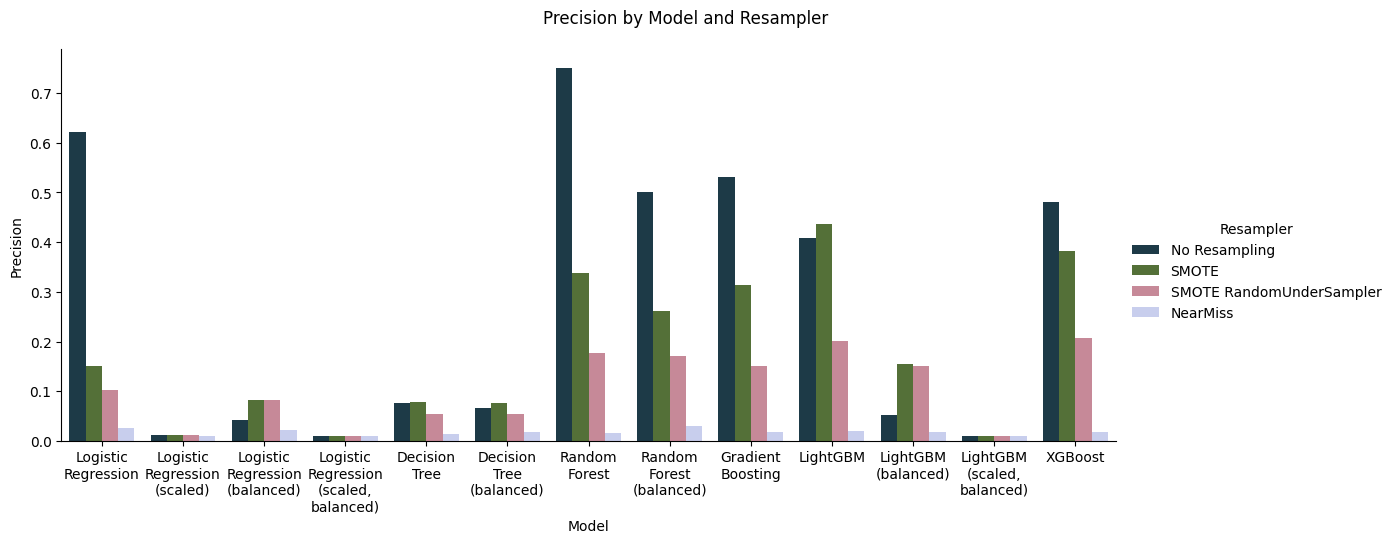

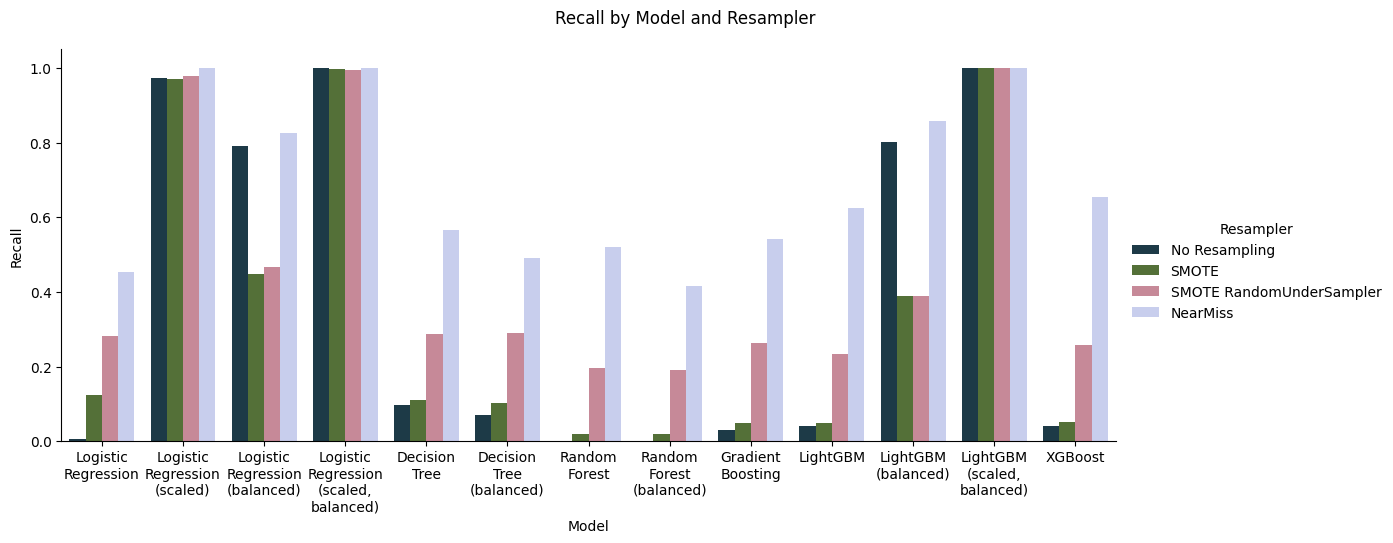

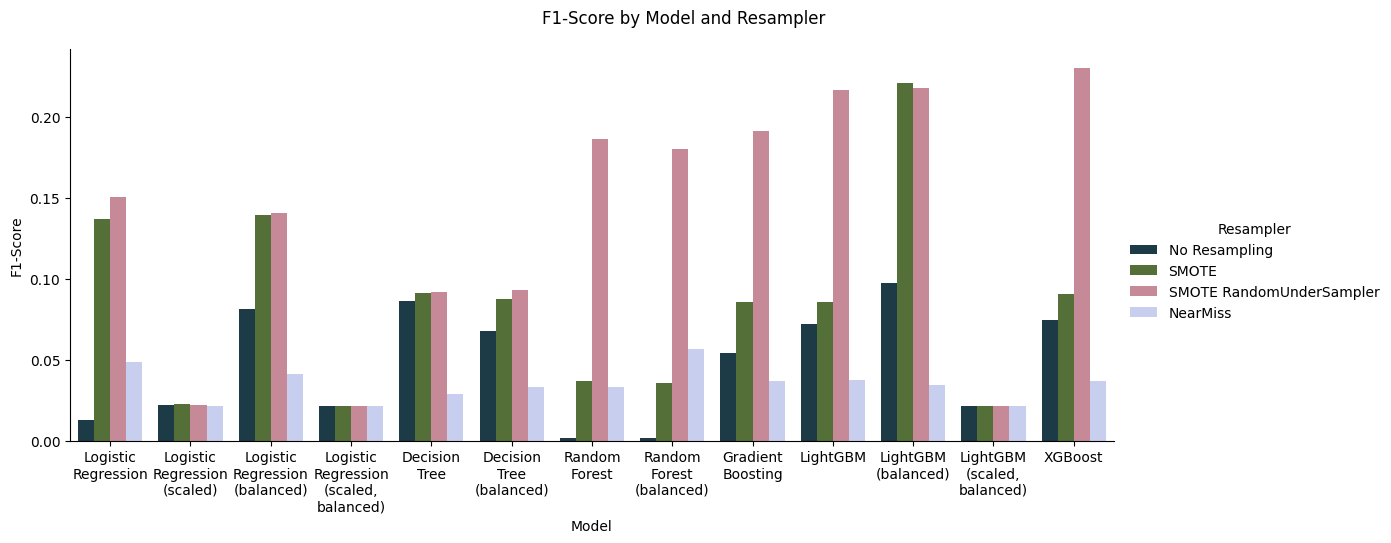

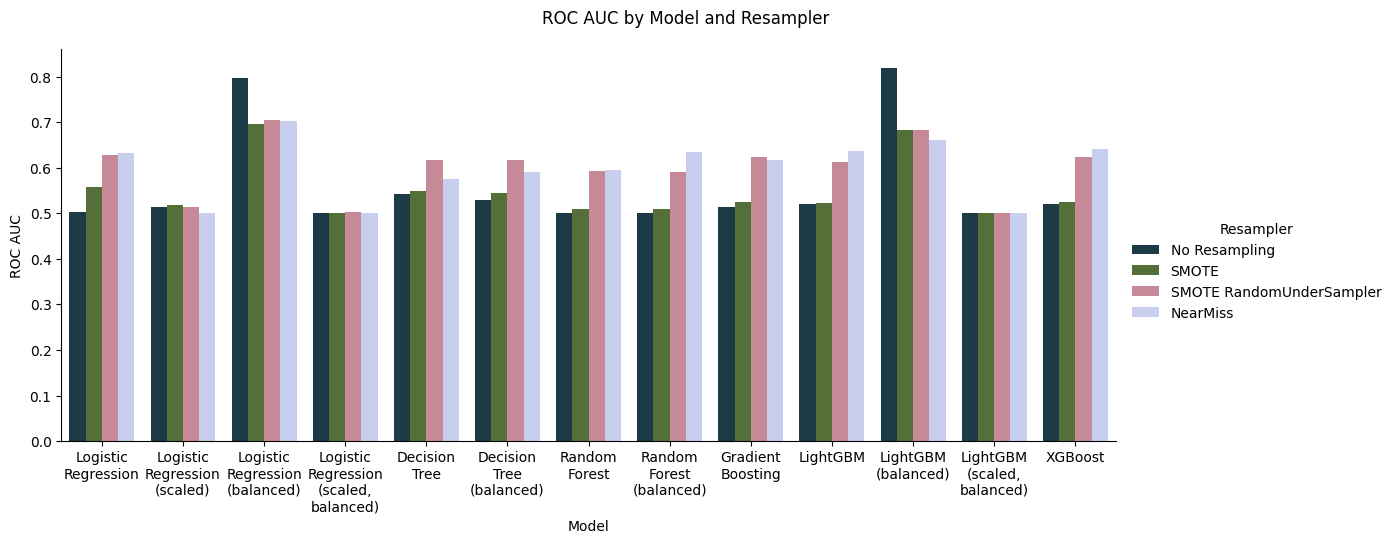

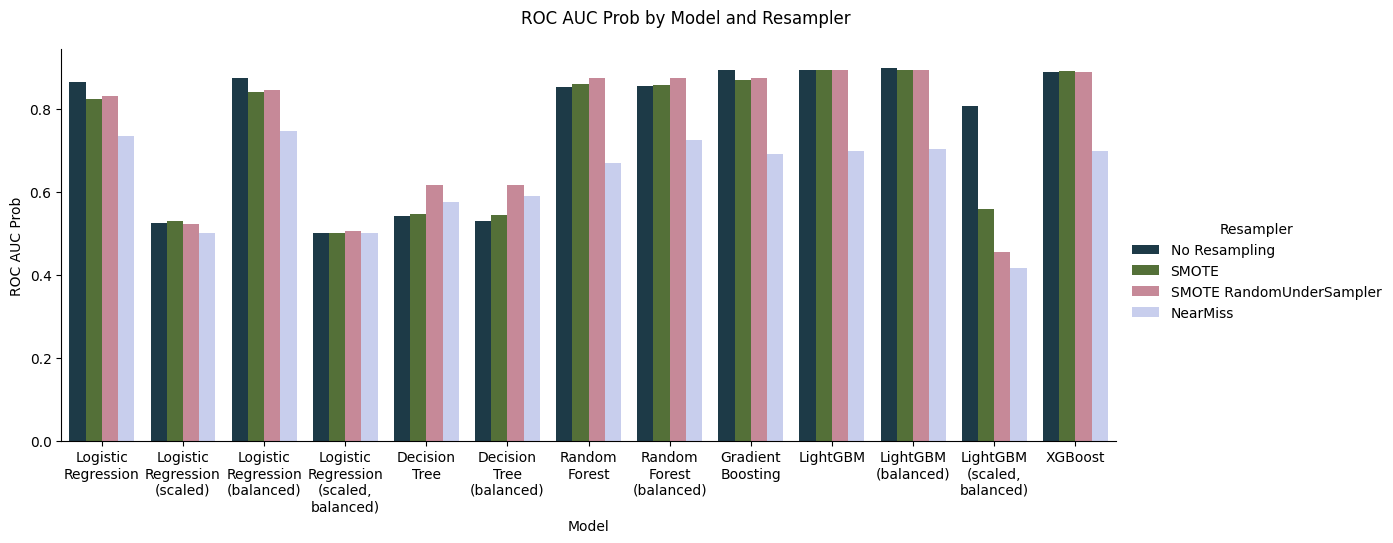

In [33]:
import textwrap

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC AUC', 'ROC AUC Prob']

for metric in metrics:
    g = sns.catplot(data=results_metric_roc_probs, x='Model', y=metric, hue='Resampler', kind='bar', palette='cubehelix', errorbar=None, height=5, aspect=11.5/5)
    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(f'{metric} by Model and Resampler')
    # iterate over axes of FacetGrid
    for ax in g.axes.flat:
        labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
        g.set_xticklabels(labels)
plt.show()

In [34]:
# Sort dataframe by ROC AUC Prob

results_metric_roc_probs.sort_values(by=['ROC AUC Prob'])

,Model,Resampler,Precision,Recall,F1-Score,ROC AUC,ROC AUC Prob
47,"LightGBM (scaled, balanced)",NearMiss,0.011028,1.000000,0.021815,0.500000,0.415925
46,"LightGBM (scaled, balanced)",SMOTE RandomUnderSampler,0.011028,1.000000,0.021815,0.500000,0.455173
7,Logistic Regression (scaled),NearMiss,0.011028,1.000000,0.021815,0.500000,0.500000
15,"Logistic Regression (scaled, balanced)",NearMiss,0.011028,1.000000,0.021815,0.500000,0.500000
12,"Logistic Regression (scaled, balanced)",No Resampling,0.011029,1.000000,0.021818,0.500051,0.500115
13,"Logistic Regression (scaled, balanced)",SMOTE,0.011032,0.997824,0.021823,0.500184,0.500860
14,"Logistic Regression (scaled, balanced)",SMOTE RandomUnderSampler,0.011089,0.994559,0.021933,0.502748,0.505512
6,Logistic Regression (scaled),SMOTE RandomUnderSampler,0.011343,0.977875,0.022426,0.513739,0.522733
4,Logistic Regression (scaled),No Resampling,0.011336,0.974610,0.022411,0.513391,0.524852
5,Logistic Regression (scaled),SMOTE,0.011442,0.969532,0.022618,0.517750,0.528880


**Generate ROC Curves**

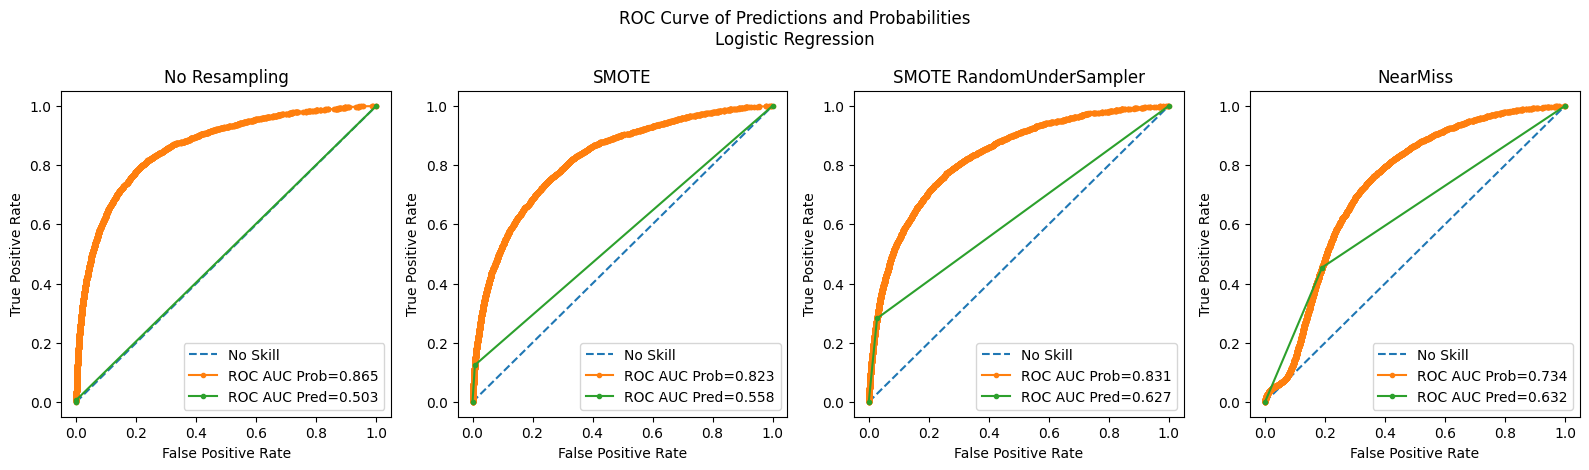

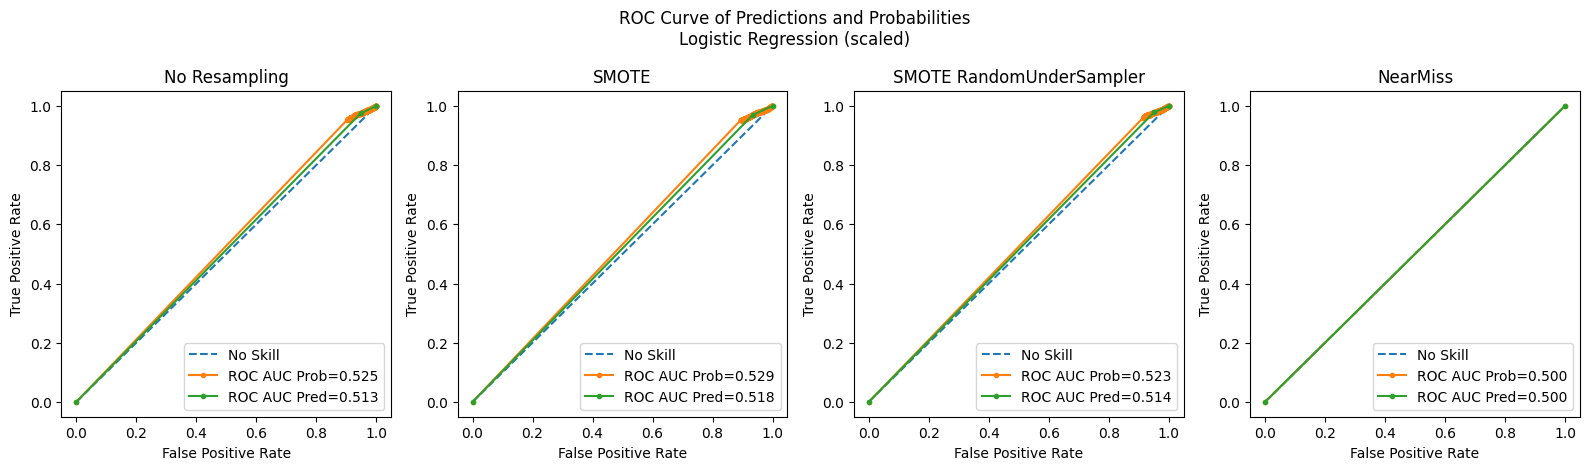

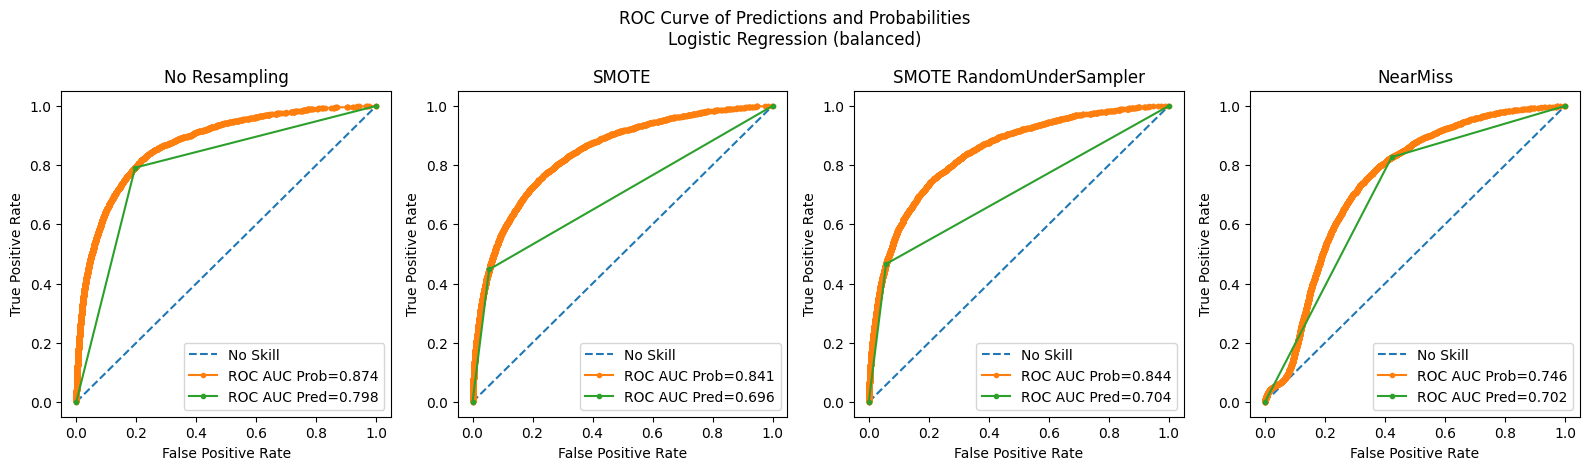

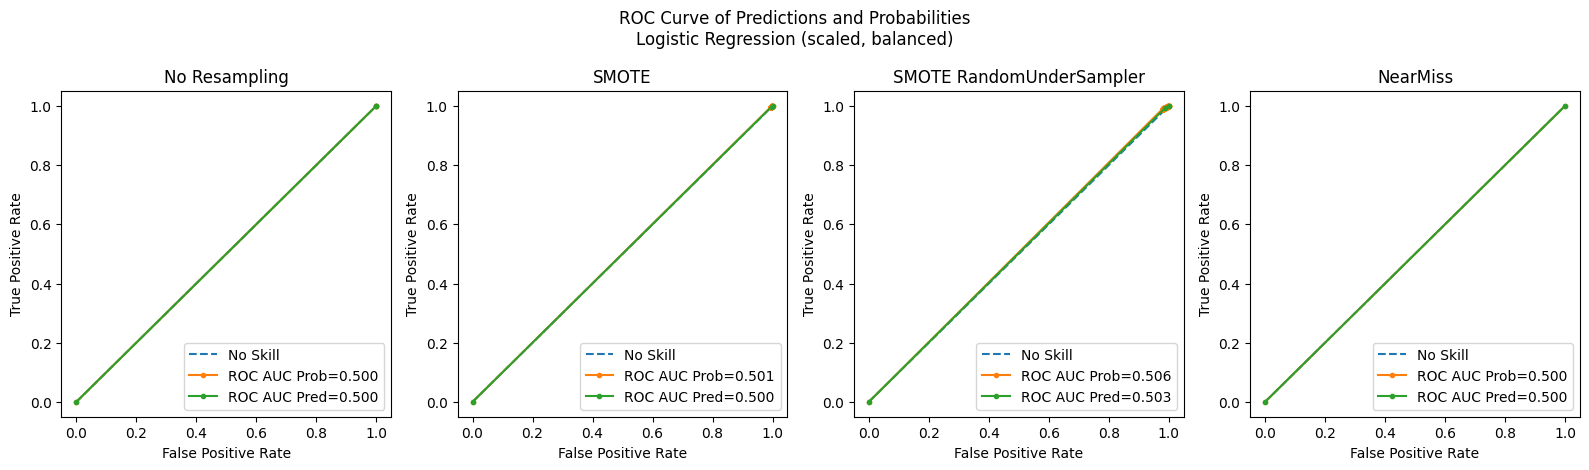

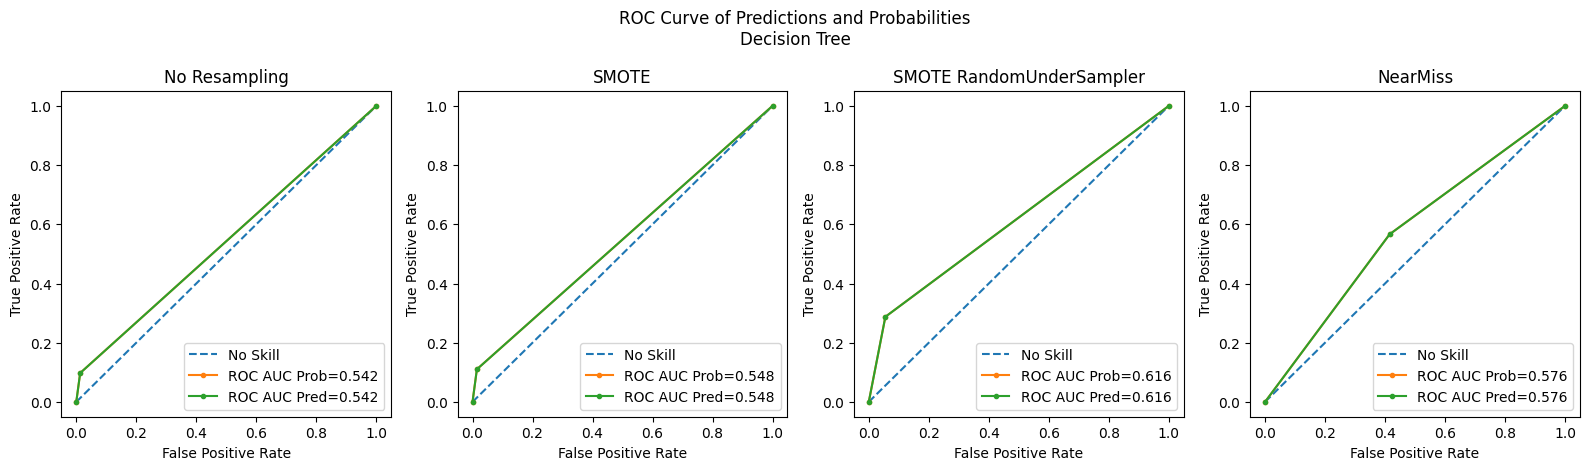

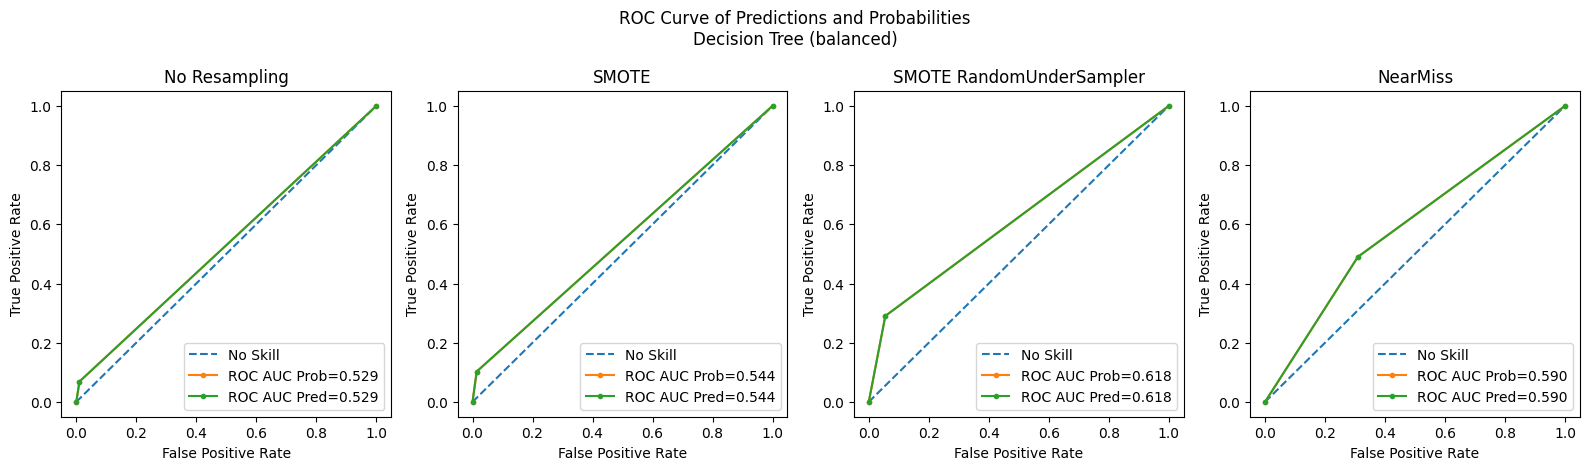

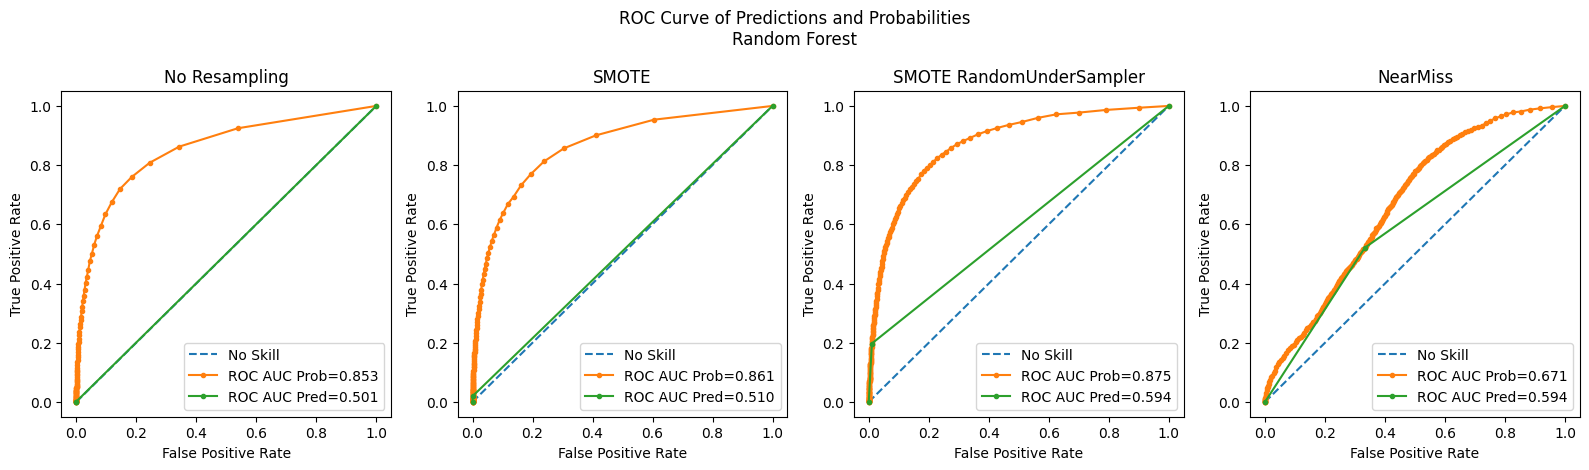

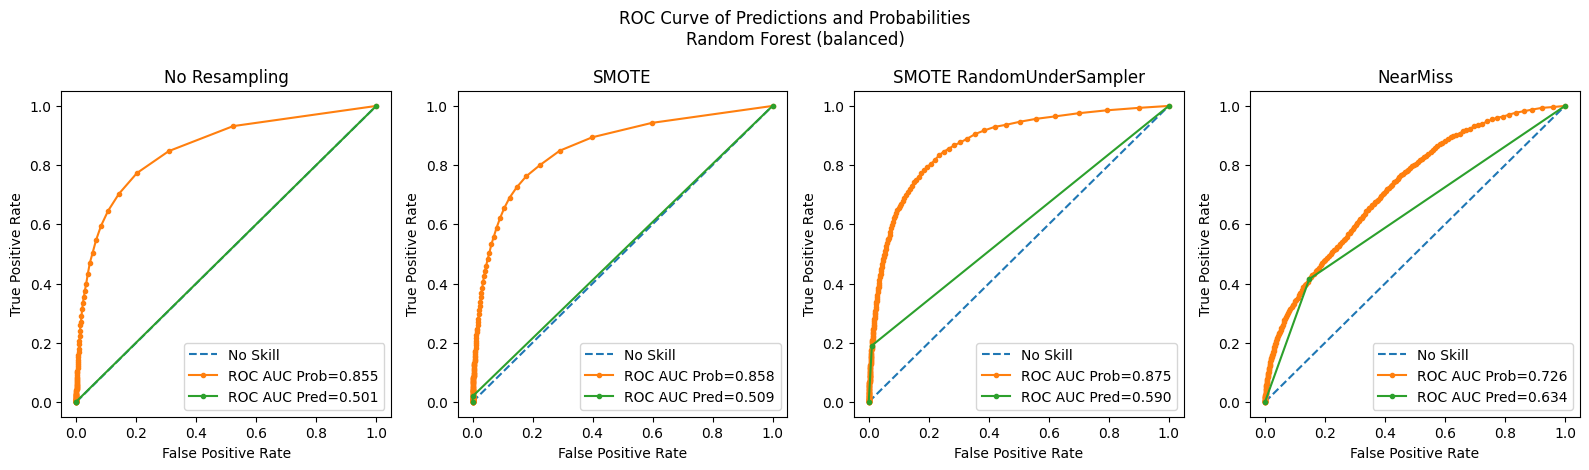

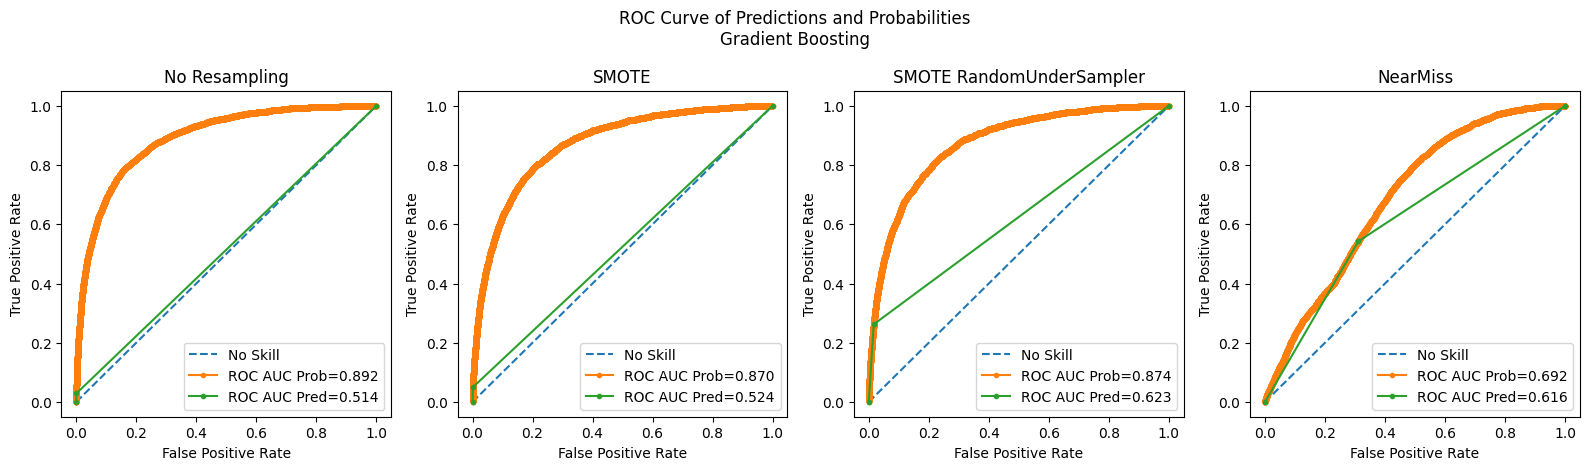

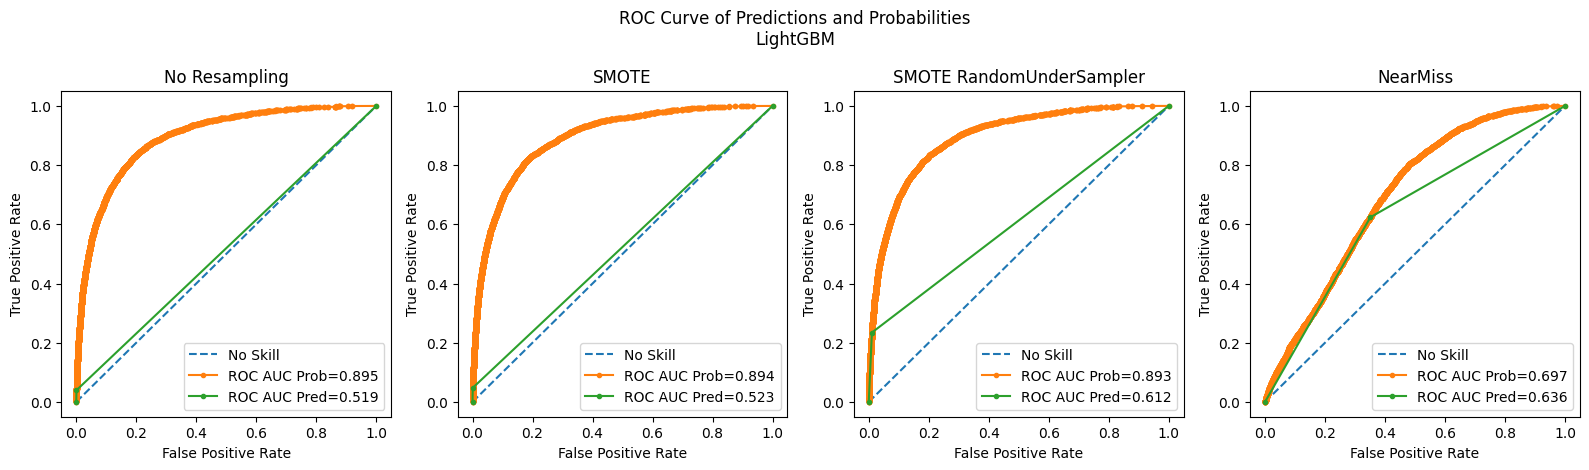

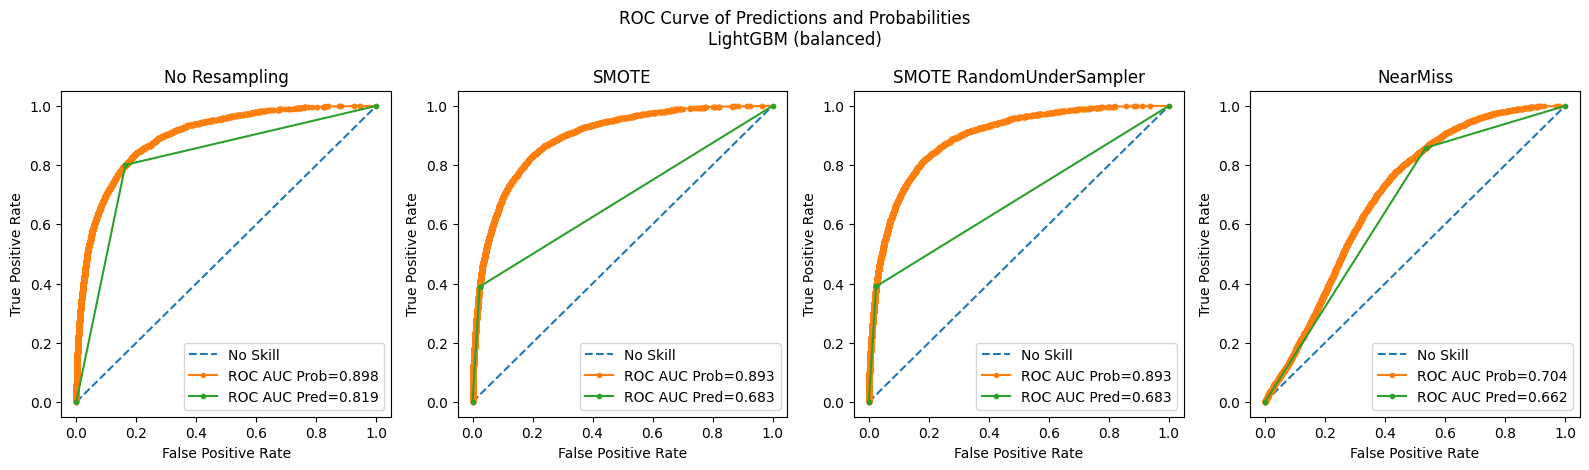

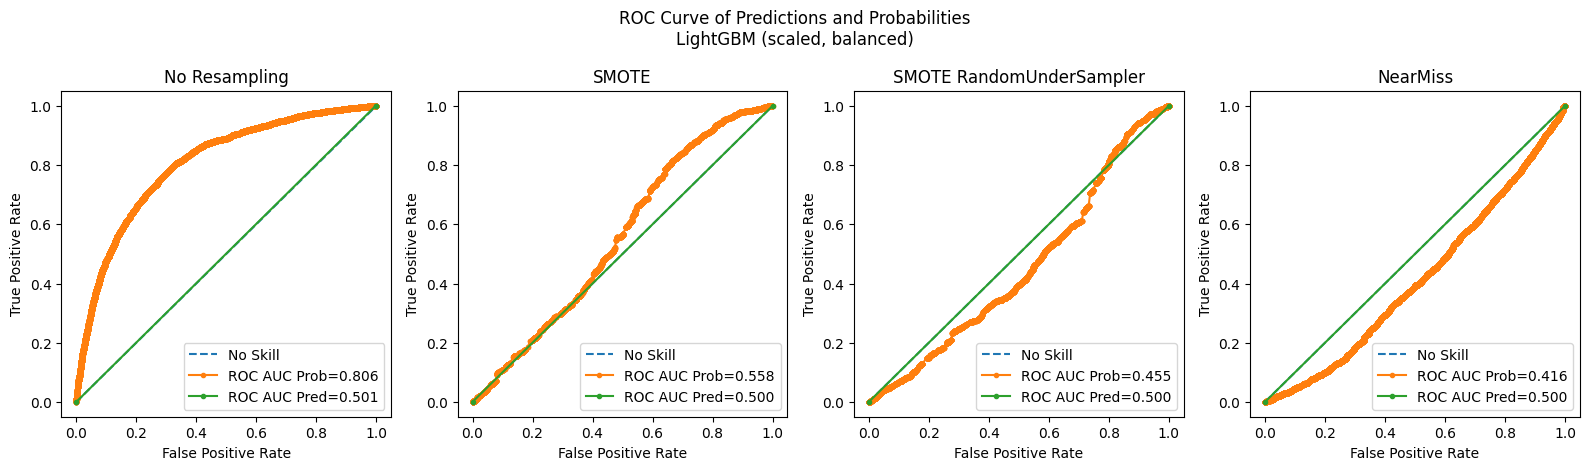

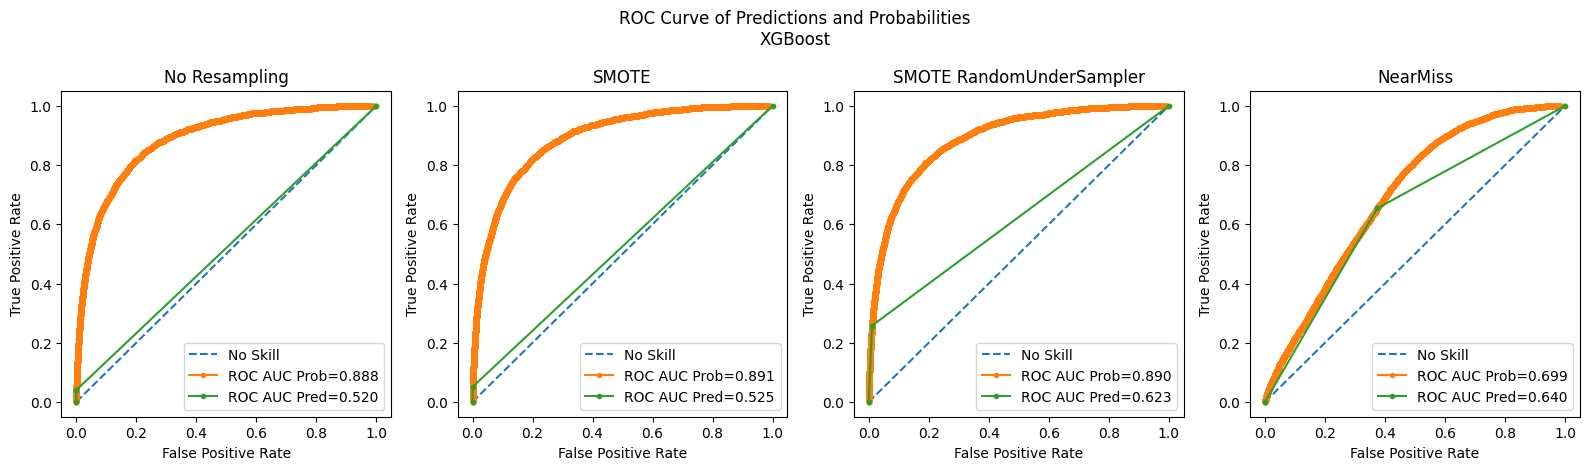

In [35]:
# Create subplots for ROC Predictions and Probabilities Curves

for i in range(0, len(results_pred), 4):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4.75))
    fig.suptitle('ROC Curve of Predictions and Probabilities\n' + results_prob[i][0])
    for j in range(4):
        subtitle = results_prob[i+j][1]
        ns_probs = [0 for _ in range(len(y_test))]
        ns_auc = roc_auc_score(y_test, ns_probs)
        model_auc_prob = roc_auc_score(y_test, results_prob[i+j][2])
        model_auc_pred = roc_auc_score(y_test, results_pred[i+j][2])
        
        # Calculate ROC Curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        prob_fpr, prob_tpr, _ = roc_curve(y_test, results_prob[i+j][2])
        pred_fpr, pred_tpr, _ = roc_curve(y_test, results_pred[i+j][2])

        # Plot ROC Curves
        ax = axes[(i+j)%4]
        ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        ax.plot(prob_fpr, prob_tpr, marker='.', label=('ROC AUC Prob=%.3f' % (model_auc_prob)))
        ax.plot(pred_fpr, pred_tpr, marker='.', label=('ROC AUC Pred=%.3f' % (model_auc_pred)))
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(subtitle, wrap=True)
        ax.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

**Generate ROC Curves using Seaborn**

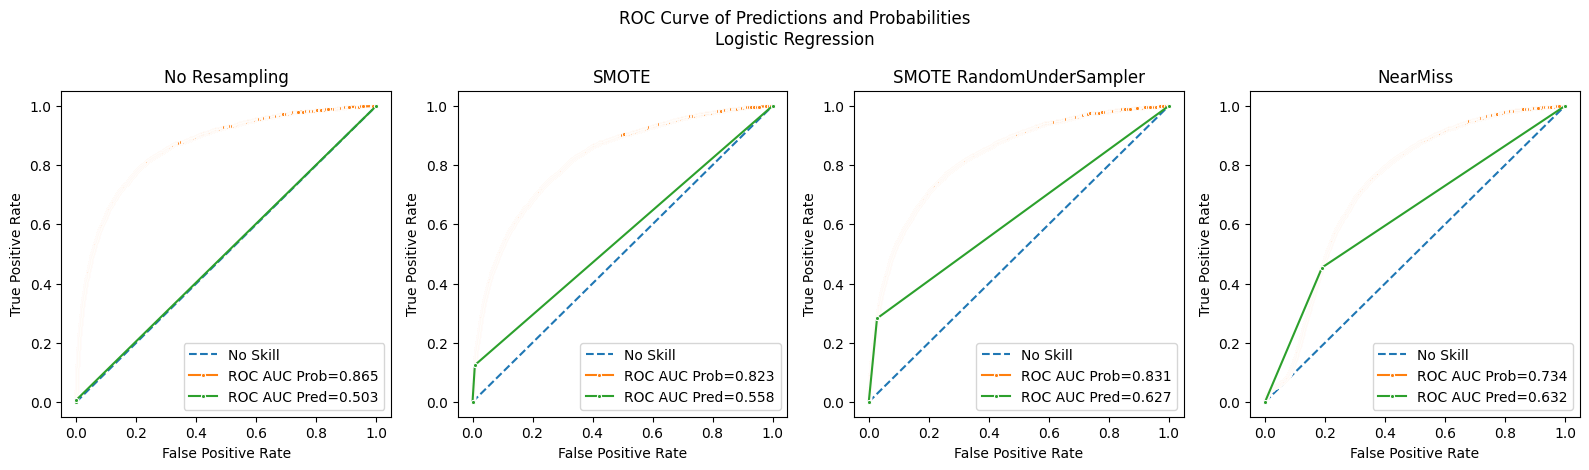

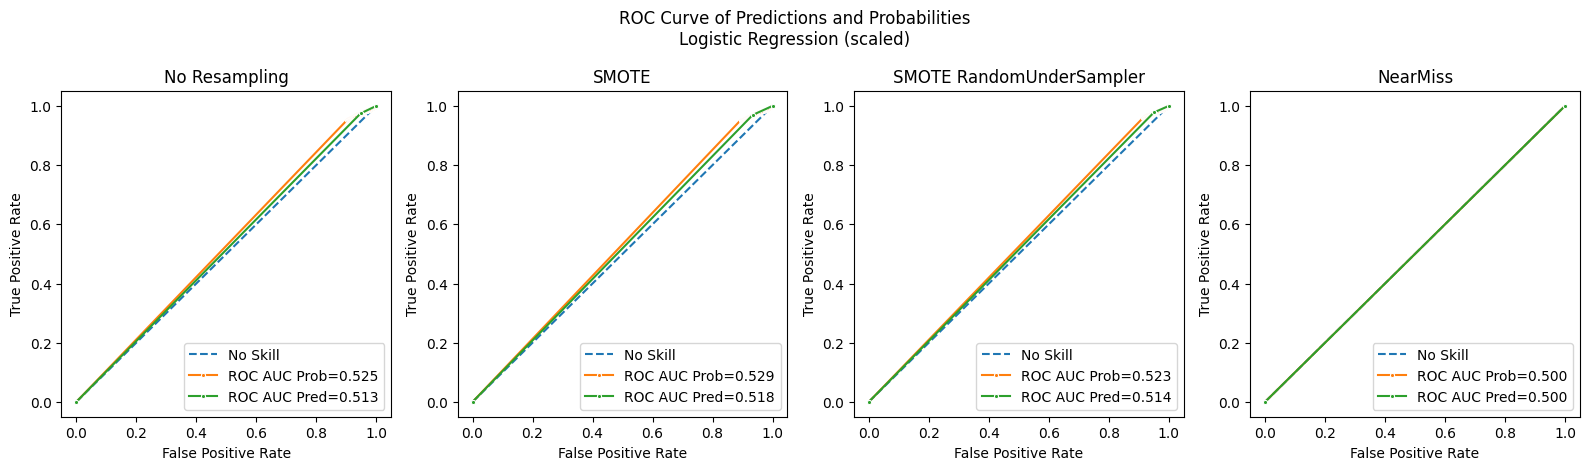

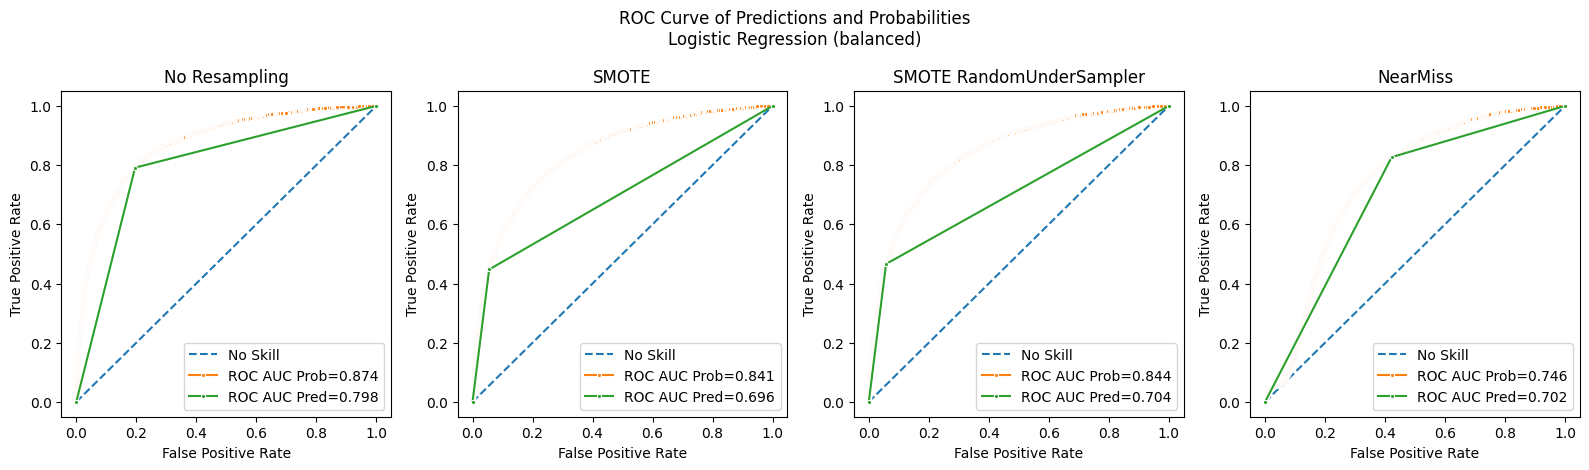

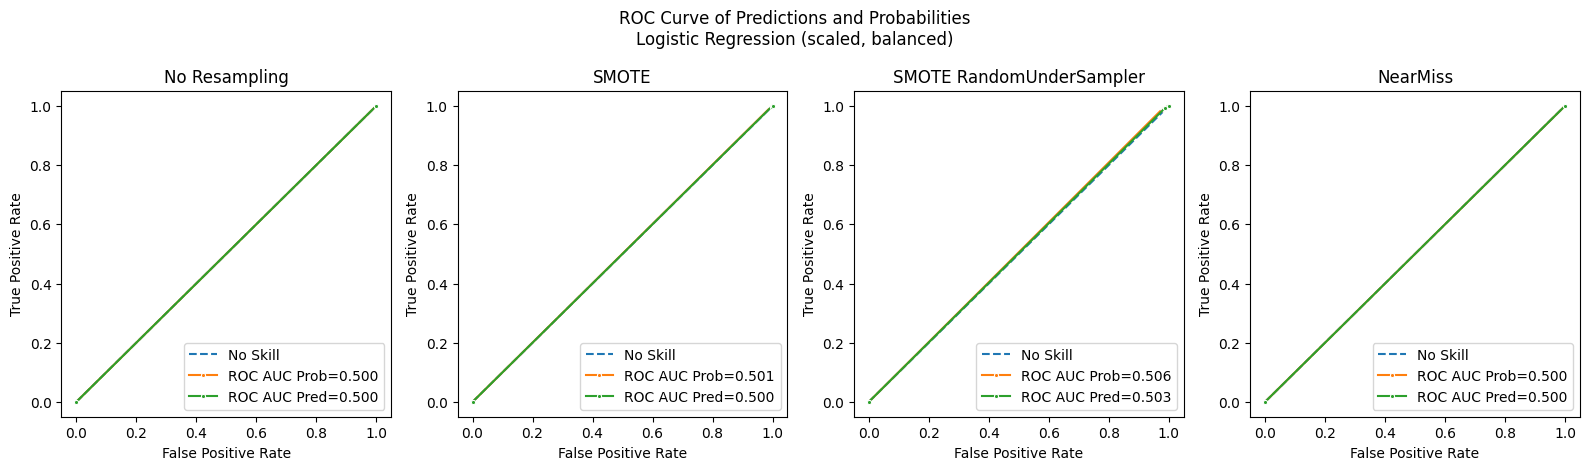

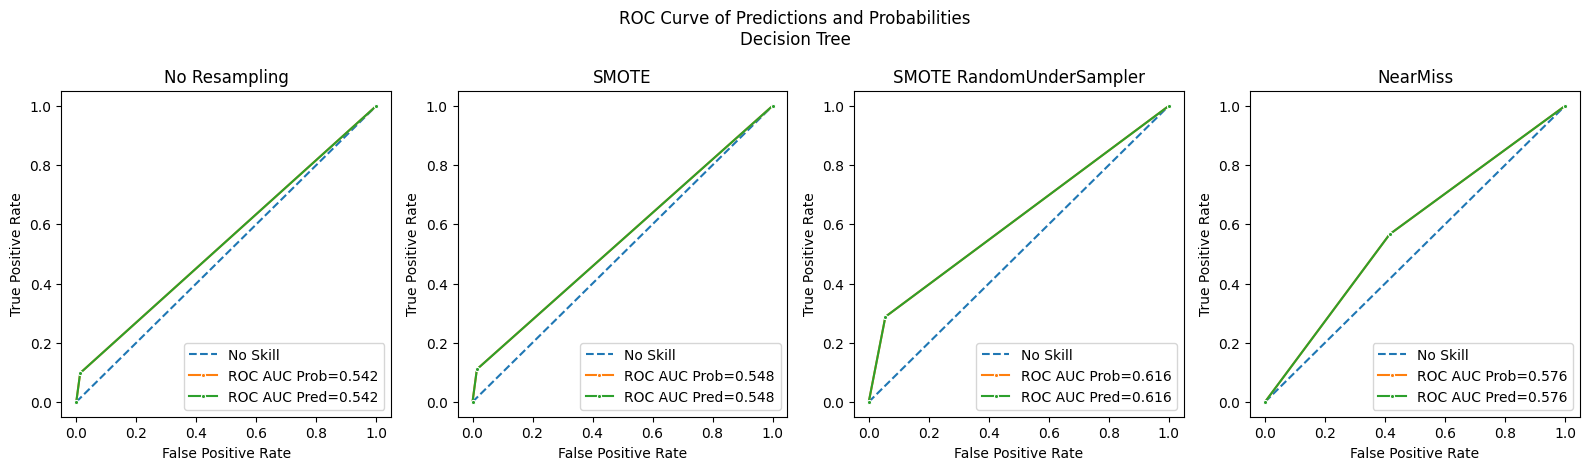

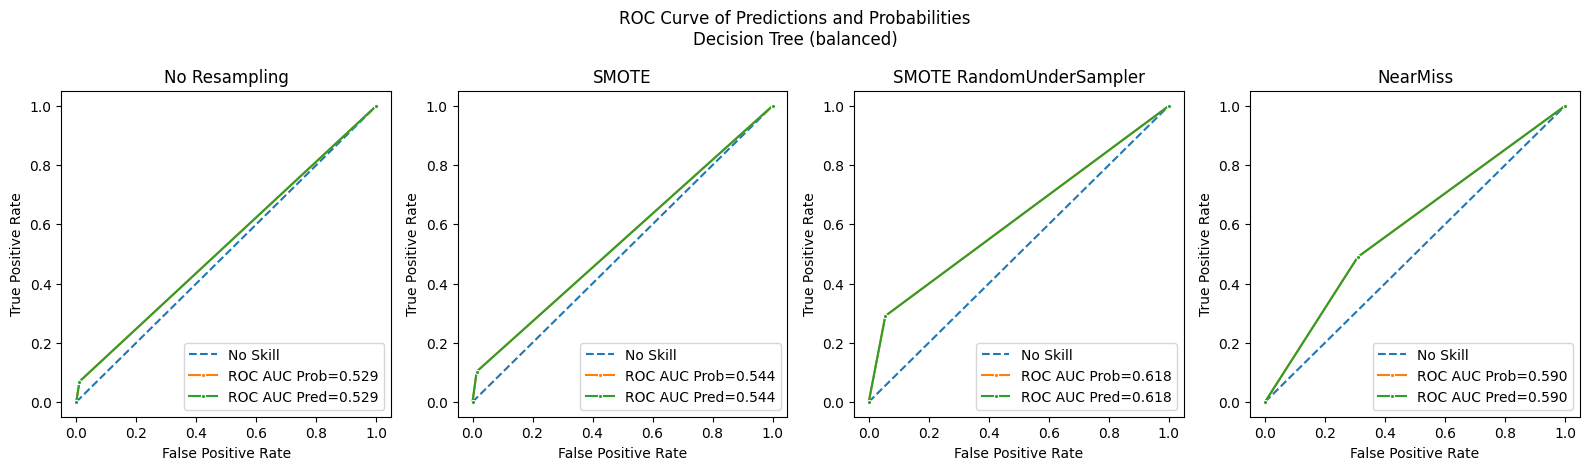

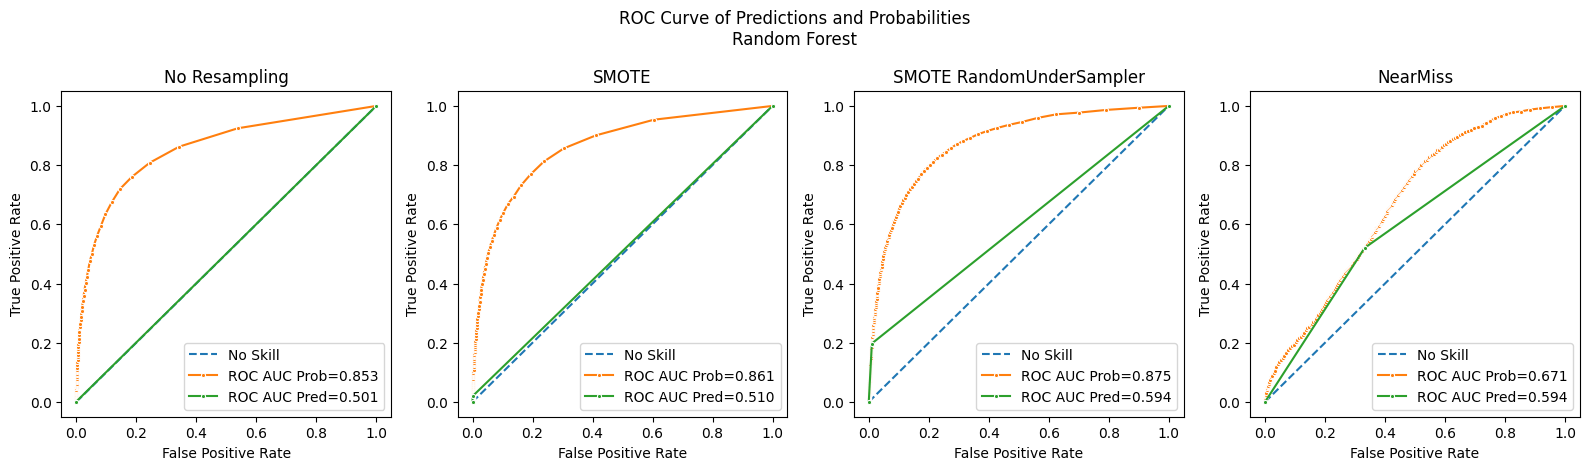

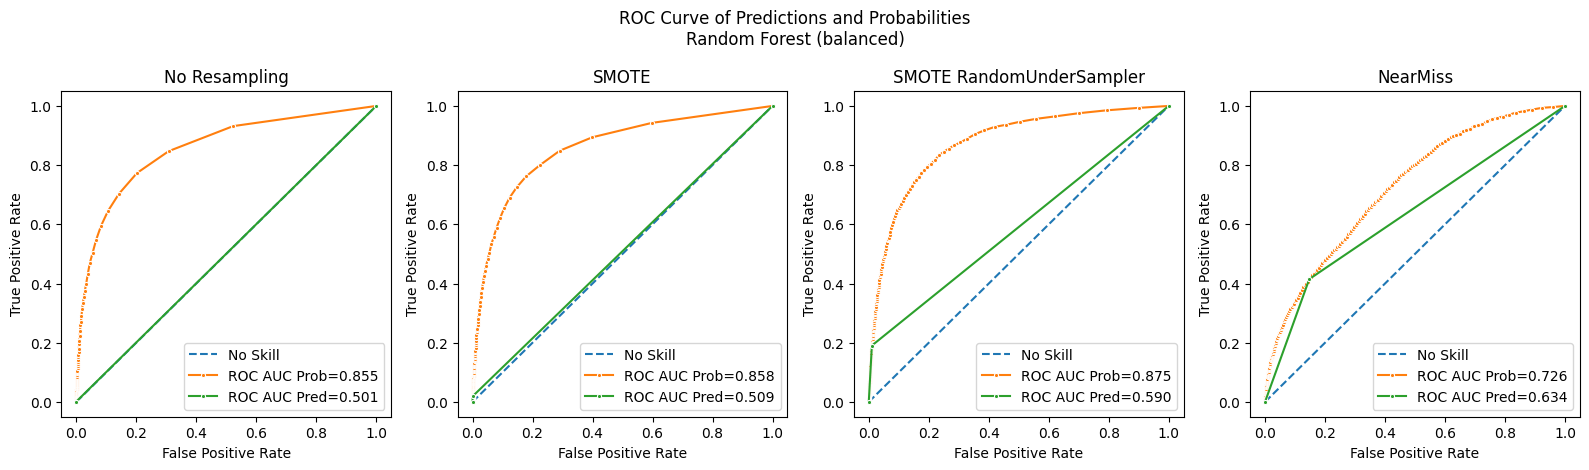

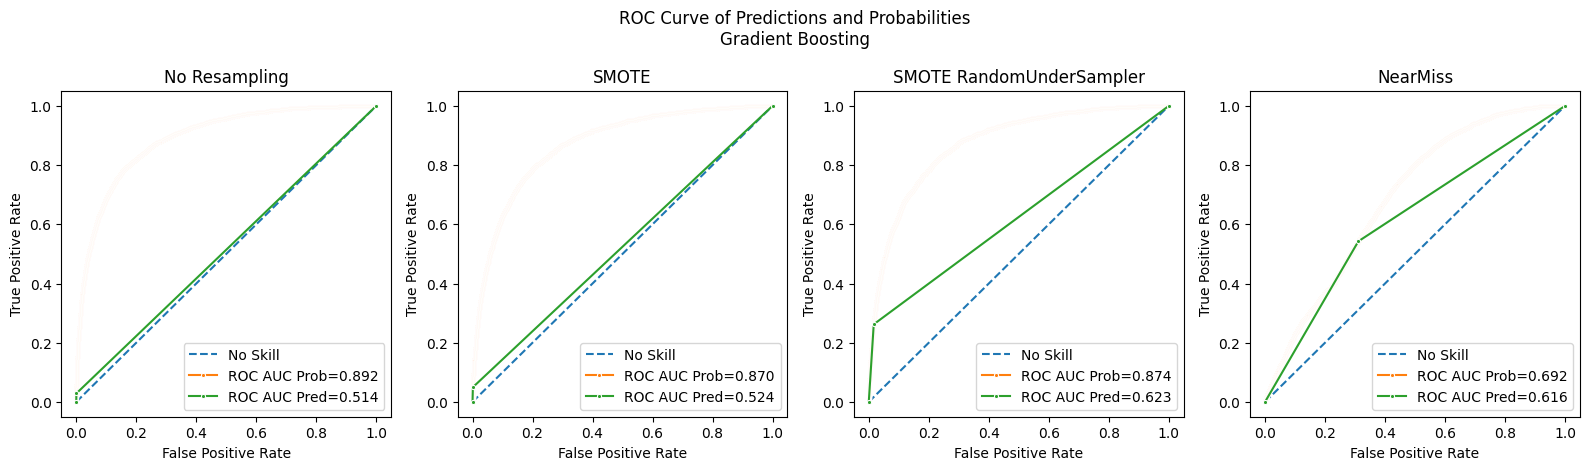

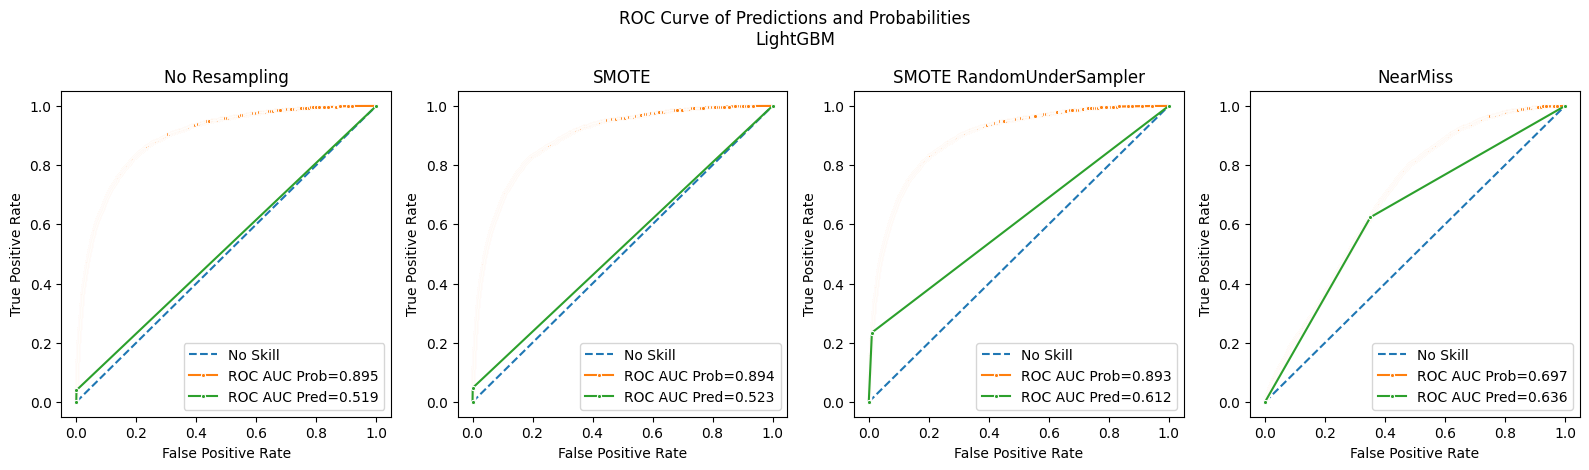

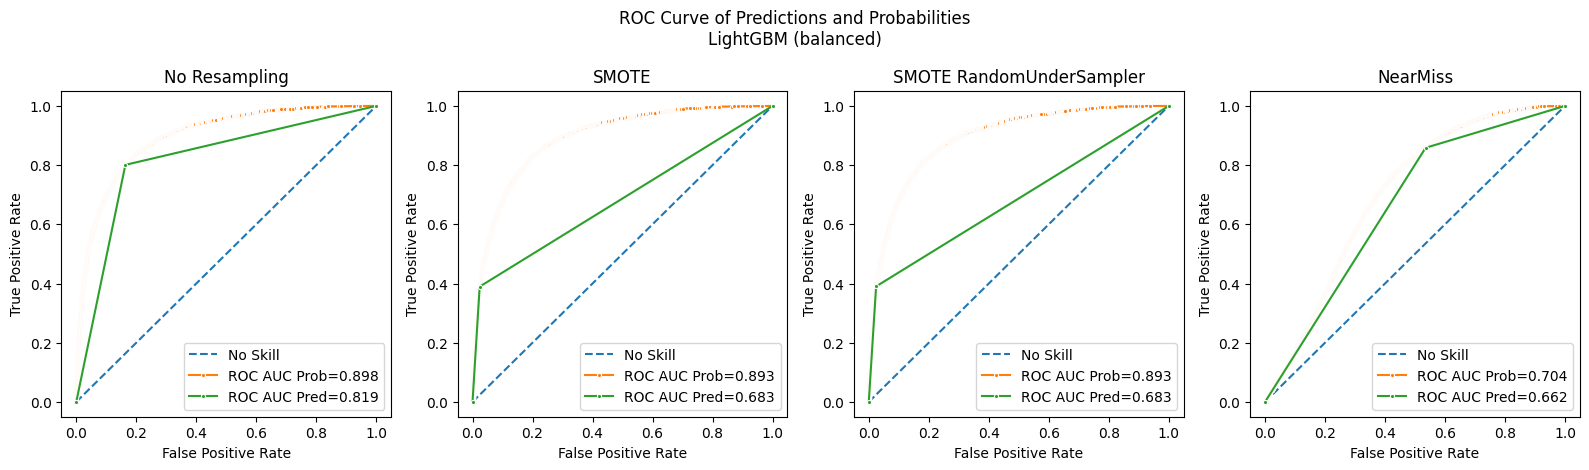

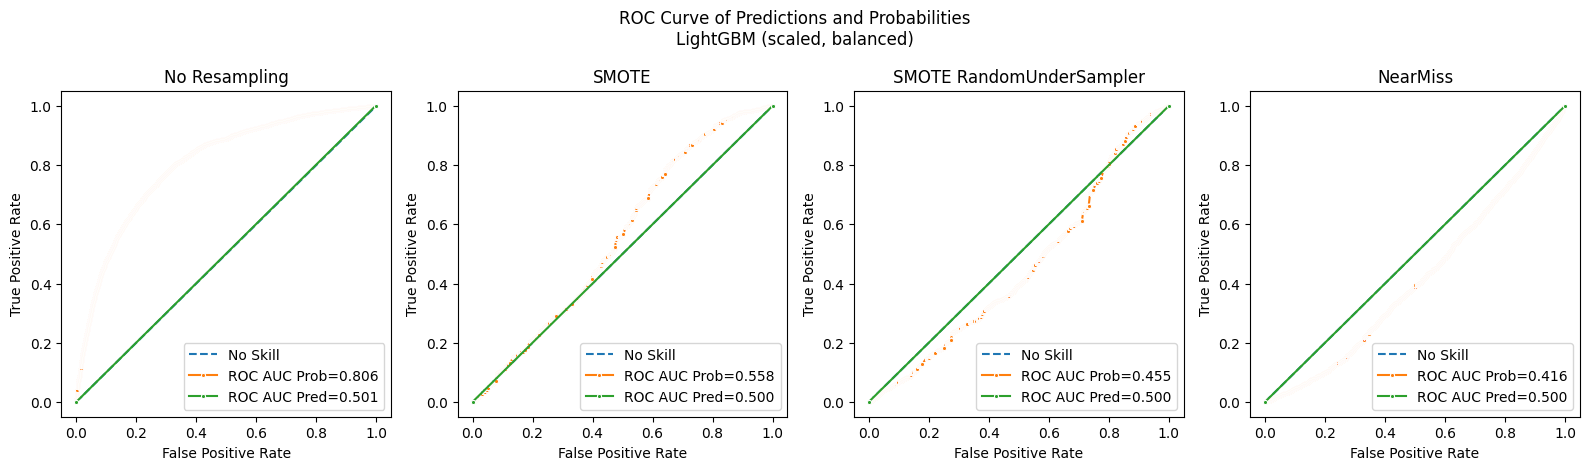

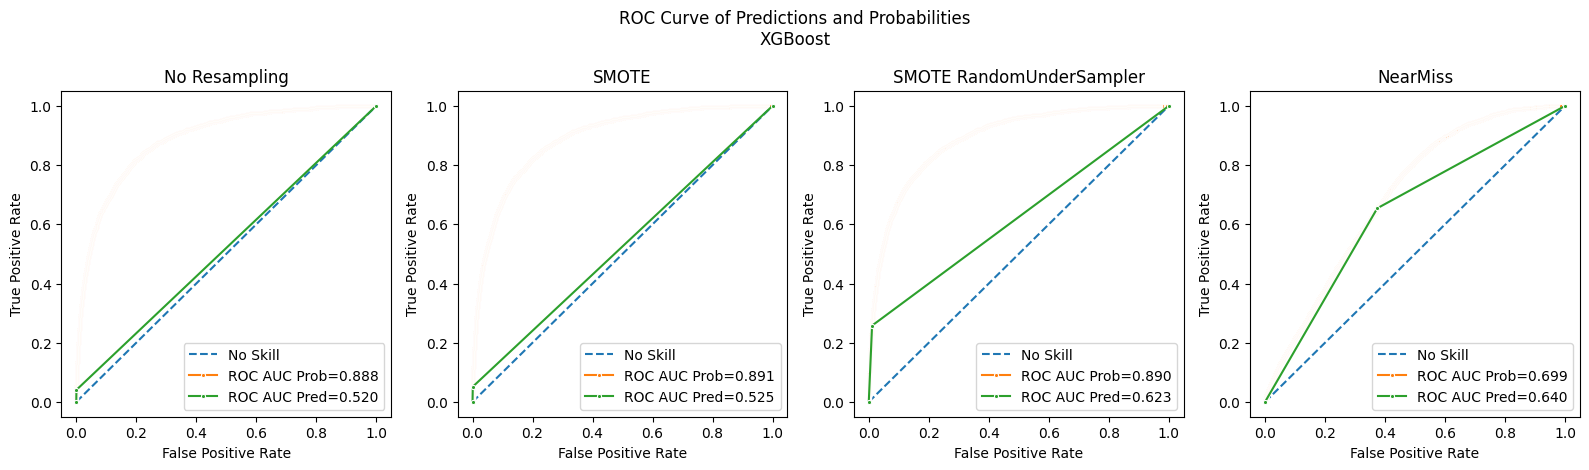

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for ROC Predictions and Probabilities Curves
for i in range(0, len(results_pred), 4):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4.75))
    fig.suptitle('ROC Curve of Predictions and Probabilities\n' + results_prob[i][0])
    for j in range(4):
        subtitle = results_prob[i+j][1]
        ns_probs = [0 for _ in range(len(y_test))]
        ns_auc = roc_auc_score(y_test, ns_probs)
        model_auc_prob = roc_auc_score(y_test, results_prob[i+j][2])
        model_auc_pred = roc_auc_score(y_test, results_pred[i+j][2])
        
        # Calculate ROC Curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        prob_fpr, prob_tpr, _ = roc_curve(y_test, results_prob[i+j][2])
        pred_fpr, pred_tpr, _ = roc_curve(y_test, results_pred[i+j][2])

        # Plot ROC Curves using Seaborn
        ax = axes[(i+j)%4]
        sns.lineplot(x=ns_fpr, y=ns_tpr, linestyle='--', label='No Skill', ax=ax)
        sns.lineplot(x=prob_fpr, y=prob_tpr, marker='.', label=('ROC AUC Prob=%.3f' % (model_auc_prob)), ax=ax)
        sns.lineplot(x=pred_fpr, y=pred_tpr, marker='.', label=('ROC AUC Pred=%.3f' % (model_auc_pred)), ax=ax)
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(subtitle, wrap=True)
        ax.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

**Explore Best ROC AUC Prob Model - LightGBM (balanced) with No Resampling**

Model:      LightGBM (balanced)
Resampler:  No Resampling


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    247243
           1       0.05      0.80      0.10      2757

    accuracy                           0.84    250000
   macro avg       0.52      0.82      0.50    250000
weighted avg       0.99      0.84      0.90    250000

2757
247243


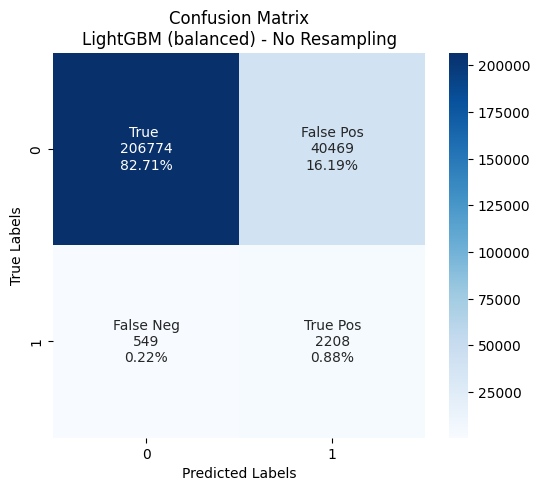

In [37]:
# Examine the LightGBM (balanced) with No Resampling model

model_name, sampler_name, model_preds = results_pred[40]
print('Model:     ', model_name)
print('Resampler: ', sampler_name)
print('\n\nClassification Report:')
CR_LGBM = classification_report(y_test, model_preds)
CM_LGBM = confusion_matrix(y_test, model_preds)

print(CR_LGBM)

# Plot confusion matrix
# Code taken from online example found here: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
fraud_count_test = y_test.sum()
nonfraud_count_test = len(y_test) - fraud_count_test

print(fraud_count_test)
print(nonfraud_count_test)

group_names = ['True ','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in CM_LGBM.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in CM_LGBM.flatten()/np.sum(CM_LGBM)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 5))
sns.heatmap(CM_LGBM, annot=labels, fmt='', cmap='Blues', cbar=True)
plt.title('Confusion Matrix\n' + model_name + ' - ' + sampler_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Perform RandomizedSearchCV to Hyperparameter Tune Best Peforming Model**

In [38]:
# # values to evaluate
# k_values = list(range(1,8))
# for k in k_values:
#     # define pipeline
#     model = DecisionTreeClassifier()
#     over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#     under = RandomUnderSampler(sampling_strategy=0.5)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#     score = np.mean(scores)
#     print('> k=%d, Mean ROC AUC: %.3f' % (k, score))